# <center>Lecture 4:  Balance and Sequentiality in Bayesian Analyses  </center>
## <center>Instructor: Dr. Hu Chuan-Peng  </center>

## 🔍 回顾 Bayes' Rule

在前面的课程中，我们使用几个简单的情况来帮助大家建立关于贝叶斯推断的直觉，这些情境包括单一事件、离散变量和连续变量。 

这些情境可以总结如下：  

| 知识点         | 内容描述                                         | 先验                   |   似然                          | 贝叶斯更新                     |  
|---------------|------------------------------------------------|------------------------|--------------------------------|------------------------------|  
| **单个事件**    | 一个使用特定语言风格的心理学实验被成功重复出来的可能性  | [OSC2015](https://doi.org/10.1126/science.aac4716)的结果           |   [Herzenstein et al 2024](https://doi.org/10.1177/09567976241254037 )年的研究结果     | 可视化的方式 + 简单计算         |  
| **离散变量**       | 多次试验(多次进行重复实验)的成功率                  | 人为分配的三种成功率(0.2, 0.5, 0.8)和它们出现的可能性  | 进行重复后的结果在**三种**成功率下出现的可能性 | 简单的手动计算 |  
| **连续变量**       | 多次试验(多次进行重复实验)的成功率/正确率                  | 符合成功率/正确率(0~1)特点和先验经验的概率分布| 进行重复后的结果在**所有**成功率/正确率下出现的可能性 | 已被证明的统计学公式|

**所以，我们学习到了什么？**
1. 贝叶斯更新本质上类似于数数，符合人类推理的直觉；
2. 贝叶斯统计的主要作用在于将上述的直觉进行数学化，从而帮助我们在更复杂的情境中解决问题。

回顾：与心理学数据的结合——**随机点运动任务(random dot task)**  

- 随机点运动任务要求被试判断运动点的移动方向（例如，向左还是向右）。  
- 根据正确率的数据，可以使用心理物理曲线描述运动强度（点的一致性百分比）与决策正确率之间的关系。  

<center>  
    <table>  
            <tr>  
                <td><img src="https://cdn.kesci.com/upload/sjwnyt1yq4.gif?imageView2/0/w/400/h/400" alt=""></td>  
                <td><img src="https://cdn.kesci.com/upload/sjzjcgwjrm.png?imageView2/0/w/400/h/400" alt=""></td>  
            </tr>  
            <tr>  
                <td>一致性60%</td>  
                <td>正确率与任务难度</td>  
            </tr>  
    </table>  
</center>  


> Shooshtari, S. V., Sadrabadi, J. E., Azizi, Z., & Ebrahimpour, R. (2018). Confidence representation of perceptual decision by EEG and eye data in a random dot motion task. *Neuroscience*, 406, 510–527. https://doi.org/10.1016/j.neuroscience.2019.03.031  

我们通过一名被试的数据推断在判断运动方向上的能力。但实际情况可能比我们这个例子更复杂，表现在两个方面：

- 我们从不同的研究中可以观察到不同的总体结果，从而让我们在看到数据前有不同的先验。  
- 不同的被试可能有不同的数据，同一个被试，也可能在不同的时间点有不同的数据。  

如下展示了不同被试在随机点任务中的正确率：

In [3]:
import pandas as pd

try:
  data = pd.read_csv("/home/mw/input/bayes3797/evans2020JExpPsycholLearn_exp1_full_data.csv")
except:
  data = pd.read_csv('data/evans2020JExpPsycholLearn_exp1_full_data.csv')

print("被试数量：", len(data.subject.unique()))
data.groupby(["subject"])[["correct"]].mean().head(10)

被试数量： 57


,correct
subject,
31727,0.651310
65359,0.753316
66670,0.680872
71329,0.697017
71737,0.822511
75445,0.668613
77704,0.611535
77845,0.675485
79861,0.765292


**本课目标：进一步强化大家关于贝叶斯推断的直觉**
- 数据在贝叶斯推断中的作用；
- 先验在贝叶斯推断中的作用。

**课程内容**
- Different data, different posteriors 
  - Beta-Binomial 组合   
  - Sequential analysis: Evolving with data 
      - 随着数据到来的后验演进过程
      - 随着数据的影响，后验如何演变？ 
      - 特性1:序列不变形
      - 特性2:累积数据依赖性
  - 补充：贝叶斯序列分析的两大特征的数学证明 
    - 数据序列不变性 
    - 证明
    - 一次性观察数据 vs 序列观察数据
- Different priors, different posteriors 
  - 极端先验  
  - 贝叶斯的主观性 
- Striking a balance between the prior & data
- 代码练习 
  - 💐Bonus：使用数学公式证明，后验确实利用了来自先验和似然的信息  

## Different data, different posteriors

仍然以上节课的随机点运动任务下的数据为例。

In [4]:
# 选取需要的列
data = data[["subject", "percentCoherence", "correct", "RT"]]

# 筛选符合条件的数据
data_subj1 = data.query('subject == 82111 & percentCoherence == 5')

# 打印前 10 条抽取的数据
print("被试 82111 在 5% 一致性正确率数据：", data_subj1.correct.mean())
data_subj1.head(5)

被试 82111 在 5% 一致性正确率数据： 0.6007905138339921


,subject,percentCoherence,correct,RT
50897,82111,5,1,1978
50898,82111,5,1,1492
50910,82111,5,1,1262
50921,82111,5,0,4318
50923,82111,5,0,4514


我们可以看到编号为“82111”的被试在253个试次中有152个试次判断为正确，5% 一致性的条件下的正确率约等于60%。

In [138]:
#统计 'binary' 列中各个值的出现次数
data_subj1['correct'].value_counts()

correct
1    152
0    101
Name: count, dtype: int64

### 回顾： Beta-Binomial模型

我们的先验分布为$Beta(70，30)$，那么编号为“82111”的被试在253个试次中，有152次判断为正确的可能性（这节课中我们假设正确率为 $\pi$ ），这个似然函数可以用**二项分布**来表示：  

$$  
Y | \pi  \sim \text{Bin}(n, \pi)  
$$  

似然函数为：  

$$  
f(y|\pi) = P(Y=y | \pi) = \binom{253}{152} \pi^{152} (1-\pi)^{101}  
$$  


这里，我们的正确率 $\pi$ 服从 **Beta** 分布，似然函数服从**二项分布**：  

$$  
Y | \pi  \sim \text{Bin}(n, \, \pi)  
$$  

$$  
\pi  \sim \text{Beta}(\alpha, \, \beta)  
$$  

从上一节课我们知道，在这种情况下，**后验分布**仍然是 Beta 分布，并且可以表示为：  

$$  
\pi | (Y = y) \sim \text{Beta}(\alpha + y, \, \beta + n - y)  
$$  

因此，编号为“82111”的被试在253个试次下，有152次判断为正确的情况时，后验分布可以写为：  

$$  
\pi | (Y = 152) \sim \text{Beta}(\alpha + 152, \, \beta + 101)  
$$  

In [5]:
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt
# 导入高级绘图工具 seaborn 为 sns
import seaborn as sns
# 导入概率分布计算和可视化包：preliz
import preliz as pz

def bayesian_analysis_plot(
    alpha, beta, y, n, 
    ax=None, 
    plot_prior=True, 
    plot_likelihood=True, 
    plot_posterior=True, 
    xlabel=r"ACC $\pi$", 
    show_legend=True,
    legend_loc="upper left"):
    """
    该函数绘制先验分布、似然分布和后验分布的 PDF 图示在指定的子图上。
    
    参数:
    - alpha: Beta 分布的 alpha 参数（先验）
    - beta: Beta 分布的 beta 参数（先验）
    - y: 观测数据中的支持次数
    - n: 总样本数
    - ax: 子图对象，在指定子图上绘制图形
    """

    if ax is None:
        ax = plt.gca()

    if plot_prior:
        # 先验分布
        prior = pz.Beta(alpha, beta)
        prior.plot_pdf(color="black", ax=ax, legend="None")
        x_prior = np.linspace(prior.ppf(0.0001), prior.ppf(0.9999), 100)
        ax.fill_between(x_prior, prior.pdf(x_prior), color="#f0e442", alpha=0.5, label="prior")

    if plot_likelihood:
        # 似然分布 (两种写法等价)
        # likelihood = pz.Beta(y,n-y)
        # likelihood.plot_pdf(color="black", ax=ax, legend="None")
        x = np.linspace(0,1,1000)
        likelihood = pz.Binomial(n=n, p=y/n).pdf(x=x*n)
        likelihood = likelihood * n
        ax.plot(x, likelihood, color="black", label=r"$\mathbf{Binomial}$"+rf"(n={n},p={round(y/n,2)})")
        ax.fill_between(x, likelihood, color="#0071b2", alpha=0.5, label="likelihood")

    if plot_posterior:
        # 后验分布
        posterior = pz.Beta(alpha + y, beta + n - y)
        posterior.plot_pdf(color="black", ax=ax, legend="None")
        x_posterior = np.linspace(posterior.ppf(0.0001), posterior.ppf(0.9999), 100)
        ax.fill_between(x_posterior, posterior.pdf(x_posterior), color="#009e74", alpha=0.5, label="posterior")

    if show_legend:
        ax.legend(loc=legend_loc)
    else:
        ax.legend().set_visible(False)

    # 设置图形
    ax.set_xlabel(xlabel)
    sns.despine()

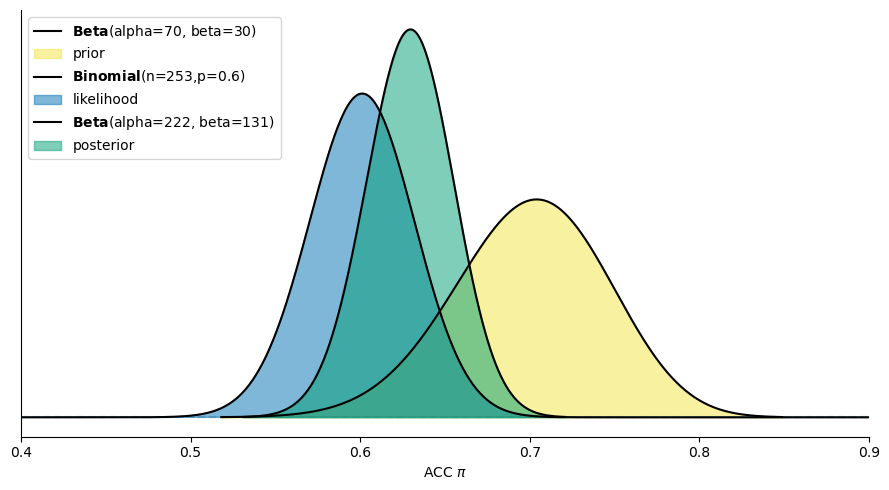

In [4]:
# 创建一个单独的图和轴
fig, ax = plt.subplots(figsize=(9, 5))

# 先验参数 alpha=70, beta=30, 观测数据 y=152, n=253
bayesian_analysis_plot(alpha=70, beta=30, y=152, n=253, ax=ax) 
ax.set_xlim(0.4,0.9)

# 显示图像
plt.tight_layout()
plt.show()

在看过单个被试的后验分布后，你或许会想，不同输入数据下后验分布有何区别？  

通过贝叶斯公式我们知道，后验的分布主要取决于先验与似然；

不同的数据将导致不同的似然。  

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} \propto f(\pi)L(\pi|y)  
$$  

接下来我们将看到，不同的似然对后验分布的影响。  

### 不同数据条件下，似然对于后验的影响

注意：这里的“不同数据”指的是这些数据具有同样的模式，仅仅是数据量不同。在这种情况下贝叶斯推断会受到什么样的影响？

刚才的例子中我们仅选择了单个被试的数据，现在我们新增一位被试，编号为31727，并且此被试在三个不同的实验区块（block）中进行了实验。
- 为便于表示，在本例中我们将被试在3个block中的数据结果分别命名为a、b、c。

每次block的表现如下： 

- 第1个 block（a）：进行了 128 次试次，其中有 77 次（60%）判断为正确。  
- 前2个 block（a+b）：进行了 254 次试次，其中有 152 次（60%）判断为正确。  
- 全部3个 block（a+b+c）：进行了 385 次试次，其中有 231 次（60%）判断为正确。  

可以看出, 这个被试的表现相当稳。

问题：你认为以上三种情况下，我们得到的后验会不会有不同，为什么？以及，如果我们使用经典统计的看会有什么结果？

**先验信念**，仍然为$Beta(70, \, 30)$。
  
我们将使用被试（31727）的观测数据，分析不同的似然函数，以及它们是如何影响每个block下后验分布的更新。

我们可以把三种似然函数写出来：  

**第1个 block的情况**:  

在 a 的情况下（128次试次，77次判断为正确），似然函数为：  

$$  
f(y \mid \pi) = P(Y = 77 \mid \pi) = \binom{128}{77} \pi^{77} (1 - \pi)^{128 - 77}  
$$  

即：  

$$  
f(y \mid \pi) = \binom{128}{77} \pi^{77} (1 - \pi)^{51}  
$$  

**前2个 block的情况**:  

在 a+b 的情况下（254次试次，152次判断为正确），似然函数为：

$$  
f(y \mid \pi) = P(Y = 152 \mid \pi) = \binom{254}{152} \pi^{152} (1 - \pi)^{254 - 152}  
$$  

即：  

$$  
f(y \mid \pi) = \binom{254}{152} \pi^{152} (1 - \pi)^{102}  
$$  

**全部3个 block的情况**:  

在 a+b+c 下（385次试次，231次判断为正确），似然函数为：

$$  
f(y \mid \pi) = P(Y = 231 \mid \pi) = \binom{385}{231} \pi^{231} (1 - \pi)^{385 - 231}  
$$  

即：  

$$  
f(y \mid \pi) = \binom{385}{231} \pi^{231} (1 - \pi)^{154}  
$$  

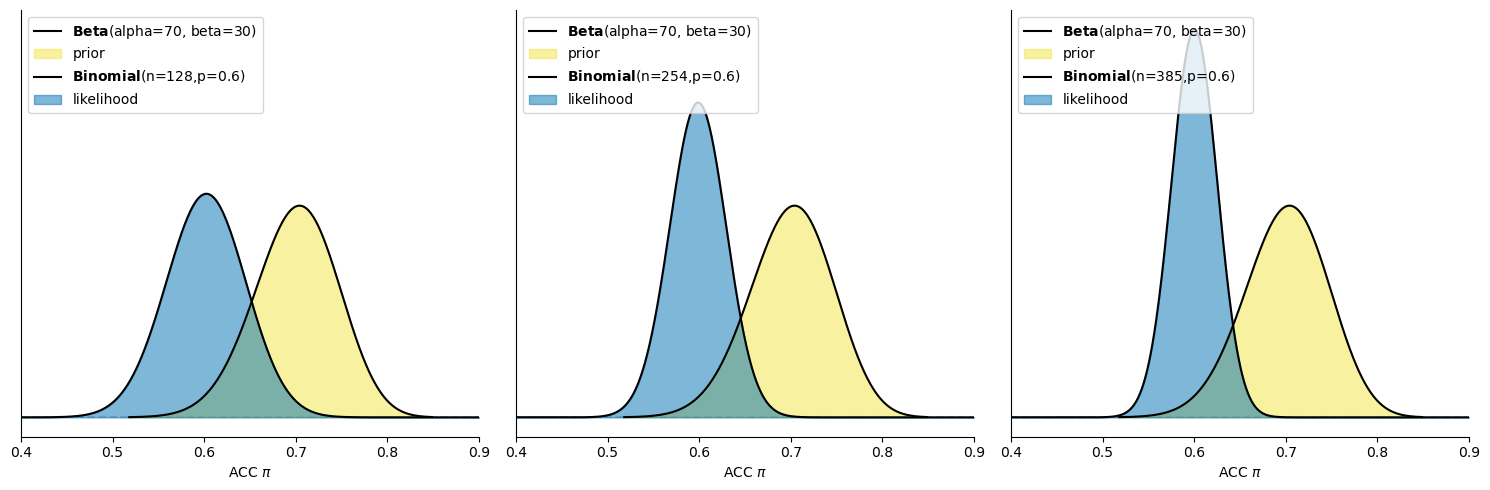

In [5]:
# 定义先验分布的 alpha 和 beta
alpha = 70
beta = 30

# 根据数据定义不同的二项分布数据 (y, n)
data_list = [(77, 128), (152, 254), (231, 385)]

# 创建一个包含三个子图的画布
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    bayesian_analysis_plot(alpha=alpha, beta=beta, y=data_list[i][0], n=data_list[i][1], ax=ax, plot_posterior=False) 
    ax.set_xlim(0.4,0.9)

# 显示图形
plt.tight_layout()
plt.show()

🤔**思考时间**：  

这些数据的“正确率”完全相同，仅仅是数据的**量**不同，后验分布会一样吗？？

## 似然对后验的影响

先看图：虽然三种似然分布的均值都是 0.60，但随着样本量的增大，似然的分布变得越窄，反映的信息越集中。  

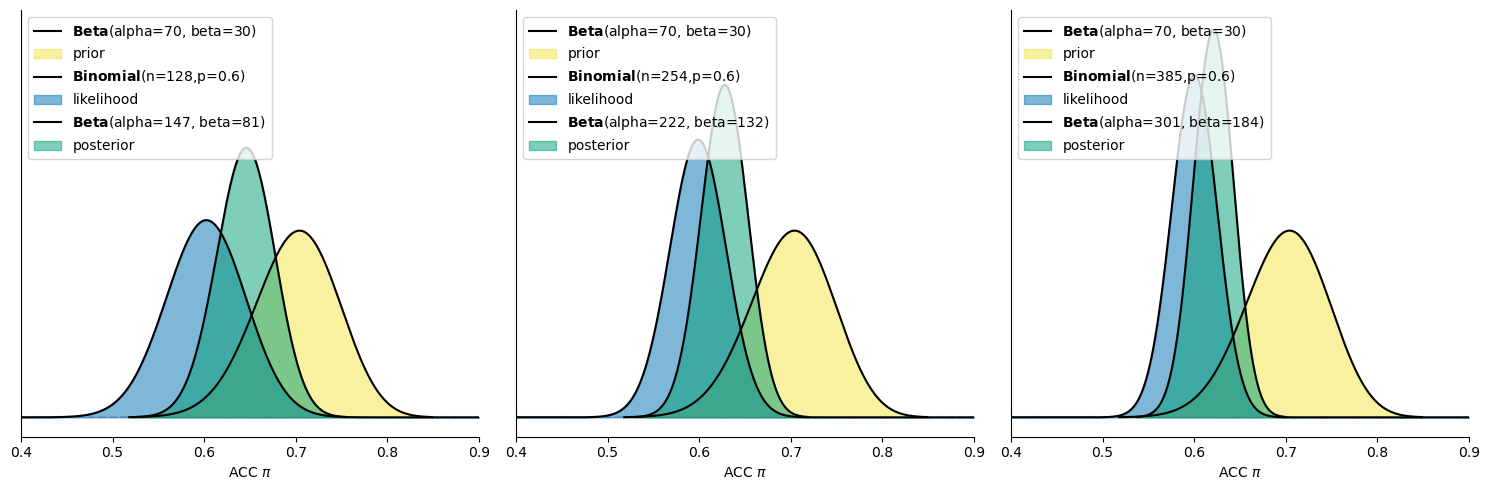

In [6]:
# 定义先验分布的 alpha 和 beta
alpha = 70
beta = 30

# 根据数据定义不同的二项分布数据 (y, n)
data_list = [(77, 128), (152, 254), (231, 385)]

# 创建一个包含三个子图的画布
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    bayesian_analysis_plot(alpha=alpha, beta=beta, y=data_list[i][0], n=data_list[i][1], ax=ax, plot_posterior=True) 
    ax.set_xlim(0.4,0.9)

# 显示图形
plt.tight_layout()
plt.show()

*注意：在似然中，y轴为$f(y|\pi)$，表示在特定的$\pi$值下产生当前数据的相对可能性。*  

- **1个 block的情况：进行了 128 次试次，其中有 77 次（60%）判断为正确**  
  - 样本量较小，似然分布较宽，意味着观测数据对正确率$\pi$的约束不强，反映出不确定性较高。  

- **2个 block的情况：一共进行了 254 次试次，其中有 152 次（60%）判断为正确**  
  - 随着样本量的增大，似然分布变得更窄，表示观测数据更加集中，推断出的正确率更加有约束力。  

- **3个 block的情况：总计进行了 385 次试次，其中有 231 次（60%）判断为正确**  
  - 样本量进一步增大，似然分布更加集中，数据提供了更强的约束，推断出的正确率更加精确。  


- **结论**  
  1. **当似然反映的信息越集中时，它对后验的影响越大**  
  2. 样本量越大，似然对正确率$\pi$的约束力越强，后验分布也会更加集中于观测结果，这使得我们对$\pi$的推断更为确定。  

我们可以使用公式快速计算出后验beta分布中的参数：

<center>  

| Situations         | Data (y, n)  | Posterior                                 |  
|-------------|------------------|------------------------------------------|  
| **a**  | y = 77, n = 128  | Beta(70 + 77, 30 + 128 - 77) = Beta(147, 81)  |  
| **a+b**  | y = 152, n = 254 | Beta(70 + 152, 30 + 254 - 152) = Beta(222, 132) |  
| **a+b+c**  | y = 231, n = 385 | Beta(70 + 231, 30 + 385 - 231) = Beta(301, 184) |  

</center>

### Sequential analysis: Evolving with data

在贝叶斯框架中，随着更多数据的到来，数据对后验的影响逐渐增加。相对地，先验信念的影响逐渐减小。总体上，数据的增加使得我们对正确率 $\pi$ 的推断更为精确。 

##### 随着数据的影响，后验如何演变？

在随机点运动任务的例子中，我们逐步观察到随着样本量的增加：  
- **先验信念的影响逐渐减弱**：最初的先验分布提供了对正确率 $\pi$ 的初步信念，但随着更多数据被观察到，先验对后验的影响逐渐减弱。  
- **数据的主导地位逐渐增强**：随着实验试次的增多，似然函数变得越来越窄，表示观测数据对正确率的推断更加集中和精确。

**序列贝叶斯分析 (Sequential Bayesian Analysis)**  

在我们的例子中，随着被试的试次不断增加，我们的后验也在逐步更新，更新过程如下：  

<center>  

| 更新步骤         | Data (y, n)  | Model                                |  
|-------------|------------------|------------------------------------------|  
| **NA**  | NA               | Beta(70, 30 ) = Beta(70, 30)  |  
| **a**  | y = 77, n = 128  | Beta(70 + 77, 30 + 128 - 77) = Beta(147, 81)  |  
| **a+b**  | y = 152, n = 254 | Beta(70 + 152, 30 + 254 - 152) = Beta(222, 132) |  
| **a+b+c**  | y = 231, n = 385 | Beta(70 + 231, 30 + 385 - 231) = Beta(301, 184) |  

<center>  

**序列贝叶斯分析（又称贝叶斯学习）**  

- 在序列贝叶斯分析中，随着新数据的到来，后验模型会逐步更新。  
- 每一份新数据都会使前一次后验模型（反映我们在观察到这些数据之前的理解）成为新的先验模型。  
  
![Image Name](https://cdn.kesci.com/upload/skex9x185z.gif?imageView2/0/w/960/h/960)


In [15]:
import preliz as pz
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import seaborn as sns
import pandas as pd
import warnings

# 忽略 FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# 初始化计数器
count = -1

# 定义按钮点击时调用的函数
def on_button_clicked(b):
    global count
    count += 1
    update_plot()  # 调用更新函数

# 更新函数，它会重新执行 interactive_plot
def update_plot():
    interactive_plot.update()  # 更新 interactive_plot 的输出

# 创建按钮并绑定点击事件
button = widgets.Button(description="Update with more data", layout=widgets.Layout(width='400px', height='60px', border_radius='10px'))
# 设置按钮的背景颜色为蓝色，字体颜色为白色
button.style.button_color = '#1E90FF'  # 浅蓝色 (可以调整为其他蓝色)
button.style.font_color = 'red'      # 字体颜色为白色
button.on_click(on_button_clicked)

def plot_func(
    data:pd.Series,
    prior_alpha = 1,
    prior_beta = 1,
    init_trial = 20,
    step=1,
    show_prior = True, 
    show_last_post = True
):
    """
    绘制贝叶斯更新过程中的后验分布和先验分布。

    参数:
    - data: pd.Series, 包含每次试验的结果(0 或 1)。
    - prior_alpha: float, beta分布的先验参数alpha。
    - prior_beta: float, beta分布的先验参数beta。
    - init_trial: int, 初始试验的编号。
    - step: int, 每次更新的步长。
    - show_prior: bool, 是否显示先验分布。
    - show_last_post: bool, 是否显示上一次试验的后验分布。
    返回:
    - ax: 当前绘制的图表对象。
    """

    # 使用全局变量`count`来记录当前试验轮次
    global count

    # 计算上一次试验和当前试验的编号
    trial_number_last = init_trial + (count-1) * step
    trial_number_current = init_trial + count * step

    # 获取当前的绘图对象
    ax = plt.gca()

    # 定义x轴上从0到1的1000个点
    x = np.linspace(0,1,1000)
    
    # 如果show_prior为True，绘制先验分布
    if show_prior:
        y = pz.Beta(prior_alpha,prior_beta).pdf(x)
        ax.plot(x,y, "-.", label="prior", color = "navy")

    # 如果count小于0，只显示先验分布并退出
    if count < 0:
        ax.set_title(f"Prior Beta: alpha={prior_alpha}, beta={prior_beta}")
        return ax
    # 如果当前试验编号超出数据长度，显示所有试验的结果并退出
    elif trial_number_current > data.shape[0]:
        ax.set_title(f"All Trials {data.shape[0]} with {data.sum()} corrects")
        return ax
    # 如果count等于0，显示初始试验的结果
    elif count == 0:
        tmp_data = data[:trial_number_current]
        ax.set_title(f"Trial {trial_number_current-init_trial} with {tmp_data.shape[0]} trials and {tmp_data.sum()} corrects")
    # 如果count大于0，显示上一次试验的后验分布（如果需要）和当前试验结果
    elif count > 0:
        tmp_data = data[trial_number_last:trial_number_current]
        ax.set_title(f"Trial {trial_number_last} with {tmp_data.shape[0]} trials and {tmp_data.sum()} corrects")

        # 如果show_last_post为True，显示上一次试验的后验分布
        if show_last_post:
            n_correct = data[:trial_number_last].sum()
            n_false = data[:trial_number_last].shape[0] - n_correct
            post_alpha = prior_alpha + n_correct
            post_beta = prior_beta + n_false
            y = pz.Beta(post_alpha,post_beta).pdf(x)
            ax.plot(x, y, label="posterior (t-1)", color = "olive", alpha = 0.3)

    # 计算当前试验的后验分布并绘制
    n_correct = data[:trial_number_current].sum()
    n_false = data[:trial_number_current].shape[0] - n_correct
    post_alpha = prior_alpha + n_correct
    post_beta = prior_beta + n_false

    # 绘制当前试验的后验分布
    y = pz.Beta(post_alpha,post_beta).pdf(x)
    ax.plot(x,y, label="posterior", color = "orangered")

    # 显示图例并去除图框
    ax.legend()
    sns.despine()


In [16]:

# 使用 interactive 创建界面
interactive_plot = widgets.interactive(
    plot_func, 
    data=widgets.fixed(data_subj1.correct),
    prior_alpha=(1, 200, 1),
    prior_beta=(1, 200, 1),
    init_trial=(1, 100, 1),
    step=(1, 20, 1)
)

# 显示按钮和 interactive 组件
display(button, interactive_plot)

Button(description='Update with more data', layout=Layout(height='60px', width='400px'), style=ButtonStyle(but…

interactive(children=(IntSlider(value=1, description='prior_alpha', max=200, min=1), IntSlider(value=1, descri…

贝叶斯推断一个最大的特性就是能够随着新数据的加入而演进。这种序列分析还有两个基本且符合常识的特点。  

- **序列不变性**：后验分布不受数据输入的序列影响，只要数据总量相同，最终结果是一致的。  
- **累积数据依赖性**：我们可以逐步或一次性评估数据，后验分布只依赖于观测数据的总量。  


##### 特性1: 序列不变性

- 在不同观测序列下的观测数据及对应的后验分布，尽管序列不同，最终结果将一致：  


| 观测序列         | Data (y, n)  | Model                                |  
|-------------|------------------|------------------------------------------|  
| **NA**  | NA               | Beta(70, 30 ) = Beta(70, 30)  |  
| **a**  | y = 77, n = 128  | Beta(70 + 77, 30 + 128 - 77) = Beta(147, 81)  |  
| **a+b**  | y = 152, n = 254 | Beta(70 + 152, 30 + 254 - 152) = Beta(222, 132) |  
| **a+b+c**  | y = 231, n = 385 | Beta(70 + 231, 30 + 385 - 231) = Beta(301, 184) |  

- 为了更好地展示序列不变性，假设被试先从区块b开始进行实验，按照b、b+c和a+b+c的序列进行更新，更新的表格如下：

| 观测序列      | Data (y, n)      | Model                                 |  
|---------------|------------------|---------------------------------------|  
| **NA**   | NA               | Beta(70, 30) = Beta(70, 30)          |  
| **b**         | y = 75, n = 126  | Beta(70 + 75, 30 + 126 - 75) = Beta(145, 81) |  
| **b+c**       | y = 154, n = 257 | Beta(70 + 154, 30 + 257 - 154) = Beta(224, 133) |  
| **a+b+c**     | y = 231, n = 385 | Beta(70 + 231, 30 + 385 - 231) = Beta(301, 184) |  

无论采取哪种序列进行观测，最终的后验分布将基于总成功数和总试次数的合并计算。  


In [ ]:
# ----------------------------------------
# ----------------------------------------

##### 特性2:累积数据依赖性

- 例如，在这三次的随机点运动任务中，共有 $n = a + b + c = 385$ 次，其中 $Y = 231$ 次判断正确。  
- 初始先验分布是 $\text{Beta}(70, 30)$，通过累积数据可以直接计算出后验分布为：  

$$  
\pi | (Y = 231) \sim \text{Beta}(70 + 231, 30 + 385 - 231) = \text{Beta}(301, 184)  
$$  


根据累积数据依赖性，后验分布只依赖于观测数据的总量，而不关心观测的顺序，无论观测顺序如何，最终的后验分布都为$\text{Beta}(530, 337)$.

### 补充：贝叶斯序列分析的两大特征的数学证明(略)

在之前的讨论中，我们通过实例展示了**数据序列不变性**的特点。接下来，我们将为该特性在所有贝叶斯模型中的适用性进行数学证明。  

#### 数据序列不变性

定义 $\theta$ 为感兴趣的任意参数，其先验概率密度函数为 $f(\theta)$。无论我们先观察数据点 $y_1$ 然后观察 $y_2$，还是先观察 $y_2$ 再观察 $y_1$，最终的后验分布都是相同的，即：  

$$  
f(\theta \mid y_1, y_2) = f(\theta \mid y_2, y_1)  
$$  

同样，无论我们一次性观察所有数据，还是按序列逐步观察数据，最终的后验分布都不受影响。  

#### 证明

为了证明这一点，我们首先考虑通过序列观察数据 $y_1$ 和 $y_2$ 来构建的后验概率密度函数 $f(\theta \mid y_1, y_2)$。  
在这个过程中，后验概率的演化可以分两步进行：  

1. **第一步**：我们首先从原始先验分布 $f(\theta)$ 和基于第一个数据点 $y_1$ 的似然函数 $L(\theta \mid y_1)$ 构建后验分布：  

   $$  
   f(\theta \mid y_1) = \frac{f(\theta) L(\theta \mid y_1)}{f(y_1)}  
   $$  

   其中，$f(y_1)$ 是归一化常数，用于确保后验分布的积分为 1。  

2. **第二步**：在观察到新的数据 $y_2$ 后，我们使用 $f(\theta \mid y_1)$ 作为先验，并根据数据 $y_2$ 更新模型：  

   $$  
   f(\theta \mid y_2, y_1) = \frac{f(\theta \mid y_1) L(\theta \mid y_2)}{f(y_2)}  
   $$  

   代入第一步中的 $f(\theta \mid y_1)$，得到：  

   $$  
   f(\theta \mid y_2, y_1) = \frac{\frac{f(\theta) L(\theta \mid y_1)}{f(y_1)} L(\theta \mid y_2)}{f(y_2)}  
   $$  

   化简后：  

   $$  
   f(\theta \mid y_2, y_1) = \frac{f(\theta) L(\theta \mid y_1) L(\theta \mid y_2)}{f(y_1) f(y_2)}  
   $$

类似地，以相反的顺序，先观察 $y_2$ 然后观察 $y_1$，我们得到同样的后验分布：  

$$  
f(\theta \mid y_1, y_2) = \frac{f(\theta) L(\theta \mid y_2) L(\theta \mid y_1)}{f(y_2) f(y_1)}  
$$  

因此，后验分布 $f(\theta \mid y_1, y_2)$ 与 $f(\theta \mid y_2, y_1)$ 相同，证明了数据的顺序不会影响最终的后验分布。

#### 一次性观察数据 vs 顺序观察数据

不仅数据的顺序不影响后验分布，观察数据的方式（一次性或逐步）也不影响最终结果。为此，假设我们从先验分布 $f(\theta)$ 开始，并同时观察数据 $(y_1, y_2)$。假设这些数据点在无条件和有条件下是独立的，那么：  

$$  
f(y_1, y_2) = f(y_1) f(y_2)  
\quad \text{和} \quad  
f(y_1, y_2 \mid \theta) = f(y_1 \mid \theta) f(y_2 \mid \theta)  
$$  

因此，从同时观察数据 $(y_1, y_2)$ 得到的后验分布为：  

$$  
f(\theta \mid y_1, y_2) = \frac{f(\theta) f(y_1, y_2 \mid \theta)}{f(y_1, y_2)}  
$$  

代入条件独立性假设：  

$$  
f(\theta \mid y_1, y_2) = \frac{f(\theta) f(y_1 \mid \theta) f(y_2 \mid \theta)}{f(y_1) f(y_2)}  
$$  

这与顺序观察数据所得的后验分布相同：  

$$  
f(\theta \mid y_1, y_2) = \frac{f(\theta) L(\theta \mid y_1) L(\theta \mid y_2)}{f(y_1) f(y_2)}  
$$  

因此，不论是一次性观察所有数据，还是按顺序逐步观察数据，最终的后验分布是相同的。  


**总结**：  

1. 贝叶斯顺序分析的两大特性——**数据顺序不变性**和**累积数据依赖性**——可以通过以上数学证明得到验证。 
    
2. 无论数据是顺序观察还是一次性观察，或者数据顺序如何变化，最终的后验分布总是不变的。  
   
3. 这一特性使得贝叶斯分析在处理动态和实时数据时具有极大的灵活性和可靠性。


Q: 这里与我们在研究中所反对的“收集数据直到*p*值显著为止”的做法有什么区别？

## Different priors, different posteriors

**不同先验分布对于后验的影响**  

在随机点运动任务中，被试正确探测出点的运动方向的取值范围在0-1之间。  

- 回顾上节课，根据(Shooshtari et al., 2019)的心理物理曲线，我们可以计算或预测当随机点的一致性为5%时，个体的正确率约为70%。
    
- 而根据(Evans et al., 2020)的实验结果，我们发现其中一个被试在随机点的一致性为5%时，个体的正确率约为60%。  

<center> <img src='https://cdn.kesci.com/upload/skeayxhg1s.png?imageView2/0/w/960/h/960'> </center>  

> Shooshtari, S. V., Sadrabadi, J. E., Azizi, Z., & Ebrahimpour, R. (2019). Confidence representation of perceptual decision by EEG and eye data in a random dot motion task. Neuroscience, 406, 510–527. https://doi.org/10.1016/j.neuroscience.2019.03.031  
> Evans, N. J., Hawkins, G. E., & Brown, S. D. (2020). The role of passing time in decision-making. Journal of Experimental Psychology: Learning, Memory, and Cognition, 46(2), 316–326. https://doi.org/10.1037/xlm0000725 

本节课我们考虑如下三种不同的先验分布：  

1. 第一种先验和上节课相同，认为参数值$\pi$(正确率) 在 0.7 左右，用 Beta(70,30)表示。  
   
2. 第二种先验比较极端，认为参数值$\pi$(正确率)大于 0.6，并且其值越大约有可能，用 Beta(10,1)表示。  
   
3. 最后一种“躺平”的思路认为，参数在$\pi$ 0-1 之间出现的可能性是完全相同的，即先验可以用均匀分布表示 Beta(1,1)。

In [ ]:
# 导入必要的库
import scipy.stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import preliz as pz

# 为 preliz 绘图设置图形样式
pz.style.library["preliz-doc"]["figure.dpi"] = 100
pz.style.library["preliz-doc"]["figure.figsize"] = (10, 4)
pz.style.use("preliz-doc")

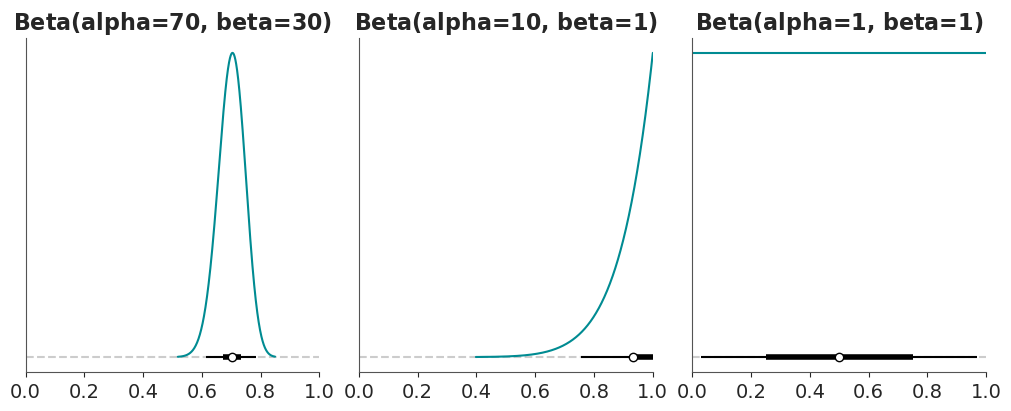

In [2]:
# 创建一个1x3的网格子图
fig, axs = plt.subplots(1, 3)

# 绘制 Beta分布的PDF，并显示置信区间
pz.Beta(70, 30).plot_pdf(pointinterval=True, ax=axs[0], legend="title")
pz.Beta(10, 1).plot_pdf(pointinterval=True, ax=axs[1], legend="title")
pz.Beta(1, 1).plot_pdf(pointinterval=True, ax=axs[2], legend="title")

# 设置每个子图的X轴范围为0到1
for ax in axs:
    ax.set_xlim(0, 1)

# 显示绘制的图形
plt.show()

**不同类型的先验**  

我们来回顾一下从先验中我们可以获得什么信息  

* 在上图中，不同的先验，反映了研究者对正确率的不同信念(认为$\pi$主要集中分布在哪里)  

* 同时，先验分布的集中程度也反映了人们对某种信念的肯定程度  

比如，对于$Beta(10,1)$这个先验，$\pi$的取值集中分布在0.6-1.0这种“高正确率区域”，说明研究者对研究的正确率的信念是很肯定的。  

而对于$Beta(1,1)$这个先验，$\pi$的取值均匀分布在0-1之间，研究者觉得$\pi$取任何值的可能性都是一样的，换言之他们也不知道$\pi$可能是多少。  

以上两种先验，可被总结为**信息型先验(informative prior)** 和 **模糊型先验(vague prior)** ，其中：  

**信息型先验**：  
- 先验分布较窄，取值范围小。  
  
- 代表研究者对研究的正确率有强烈且确定的信念。  

**模糊型先验**：  
- 先验分布较宽，取值范围大。  
  
- 代表研究者对研究的正确率缺乏确定的信念。

**结合数据查看先验对于后验的影响**  

在继续探究不同的先验如何影响后验之前，我们还需要一些**数据**  

我们依旧以Evans et al.（2020, Exp. 1） 的数据为例。  

> Evans, N. J., Hawkins, G. E., & Brown, S. D. (2020). The role of passing time in decision-making. Journal of Experimental Psychology: Learning, Memory, and Cognition, 46(2), 316–326. https://doi.org/10.1037/xlm0000725  

In [201]:
try:
  data = pd.read_csv("/home/mw/input/bayes3797/evans2020JExpPsycholLearn_exp1_full_data.csv")
except:
  data = pd.read_csv('data/evans2020JExpPsycholLearn_exp1_full_data.csv')

# 选取需要的列
data = data[["subject", "percentCoherence", "correct", "RT"]]

# 筛选符合条件的数据
data_subj1 = data.query('subject == 82111 & percentCoherence == 5')

#统计 'binary' 列中各个值的出现次数
print(data_subj1['correct'].value_counts())
data_subj1.head(5)

correct
1    152
0    101
Name: count, dtype: int64


,subject,percentCoherence,correct,RT
50897,82111,5,1,1978
50898,82111,5,1,1492
50910,82111,5,1,1262
50921,82111,5,0,4318
50923,82111,5,0,4514


**🤔 思考时间**  

下图画出了三种先验-似然组合，  

我们可以猜测一下后验分布的形状？  


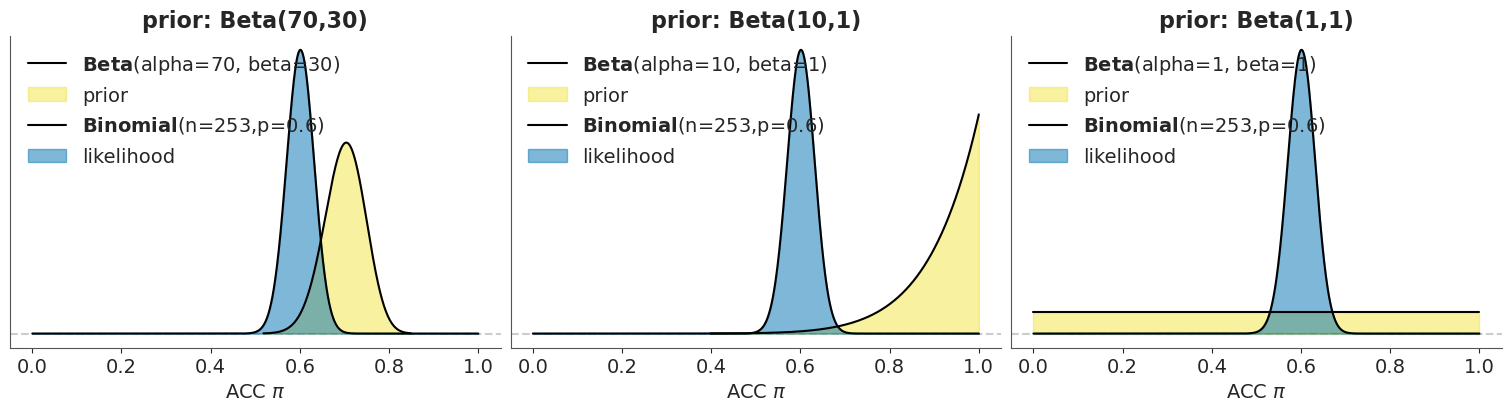

In [206]:
# 定义不同的 Beta 分布参数
params = [(70, 30), (10, 1), (1, 1)]

fig, axes = plt.subplots(nrows=1, ncols=len(params), figsize=(15, 4))

# 循环遍历不同的参数组合
for (alpha_, beta_),ax in zip(params, axes.flatten()):
   
    bayesian_analysis_plot(alpha=alpha_, beta=beta_, y=152, n=253, ax=ax, plot_posterior=False)
    
    # 设置子图标题
    ax.set_title(f'prior: Beta({alpha_},{beta_})')

# 移除图的上、右边框线
sns.despine()

**后验图示**  

我们可以使用公式来快速得到三种后验的表达式  
$$  
\pi | (Y = y) \sim \text{Beta}(\alpha + y, \, \beta + n - y)  
$$  

<center>  

|Analyst|Prior  |Posterior  
|----|-----|----|  
|$\alpha$   |Beta(70,30)|Beta(222,131)|  
|$\beta$   |Beta(10,1)|Beta(162,102)|  
|mean   |Beta(1,1) |Beta(153,102)|  

</center>  
	
在表格中，每一行展示了不同被试的先验分布和后验分布。通过结合先验和观测数据，我们得到了相应的后验 Beta 分布。  

接下来，我们可以将这些分布可视化，绘制出三种后验分布的图示，以便直观展示更新后的正确率 $\pi$ 分布。  
 

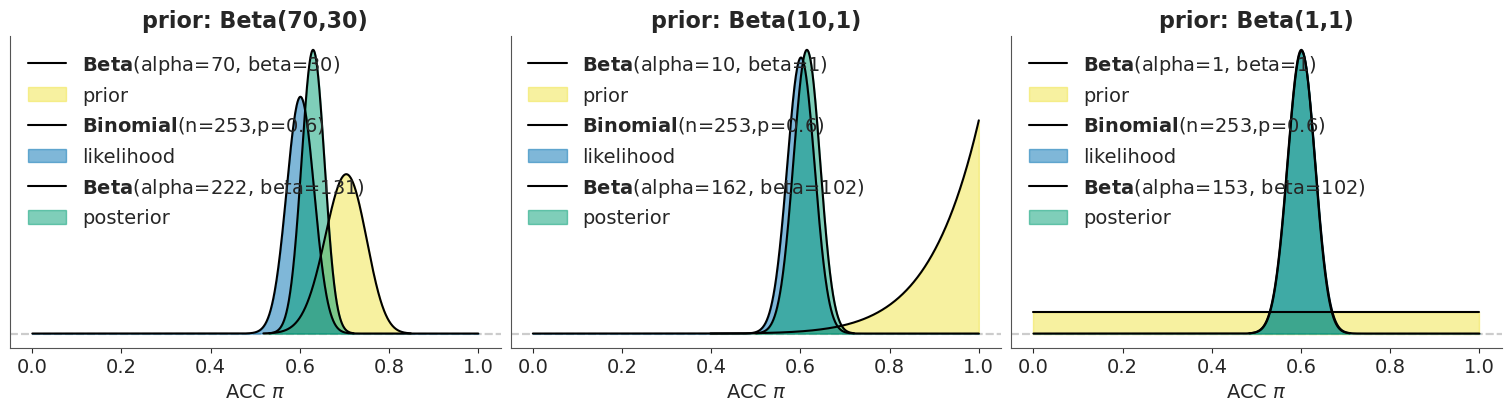

In [207]:
# 定义不同的 Beta 分布参数
params = [(70, 30), (10, 1), (1, 1)]

fig, axes = plt.subplots(nrows=1, ncols=len(params), figsize=(15, 4))

# 循环遍历不同的参数组合
for (alpha_, beta_),ax in zip(params, axes.flatten()):
   
    bayesian_analysis_plot(alpha=alpha_, beta=beta_, y=152, n=253, ax=ax)
    
    # 设置子图标题
    ax.set_title(f'prior: Beta({alpha_},{beta_})')

# 移除图的上、右边框线
sns.despine()

我们关注信息型先验和模糊型先验下的后验有什么区别：  

1. **模糊型先验下**：  
   - 如果**研究者对正确率没有明确预期**，后验分布几乎完全由数据（似然分布）决定。由于模糊型先验（如 $\text{Beta}(1, 1)$）不提供关于 $\pi$ 的有效信息，后验与似然分布几乎重合。  

2. **信息型先验下**：  
   - 当**研究者对正确率有较强的信念**，后验分布依然会受到先验的显著影响。例如，使用 $\text{Beta}(10, 1)$ 作为信息型先验，后验分布会集中在 0.6 - 0.8 区域，反映了研究者对 $\pi$ 的较高信心。  

3. **总结**：  
   - **模糊型先验**：后验主要由数据决定。  
  
   - **信息型先验**：先验对后验有强影响，后验分布倾向于维持先验的形状。

### 极端先验

在贝叶斯分析中，虽然我们通常讨论有信息和无信息的先验，但有时先验选择可能会导致严重的偏离。极端固执的先验模型可能会使贝叶斯方法失去其顺序分析的优势。  

- 这种极端先验模型通常包含先验概率为零的信念。  

- 例如，研究者可能对随机点运动任务的正确率持有固执的观点，坚信其正确率较低。他们可能认为 $\pi$ 的任何值在 0 到 0.25 之间都是等可能的，并坚决认为其不会超过 0.25。为了表达这种先验信念，可以采用 0 到 0.25 之间的均匀模型（uniform model）。  

$$  
\pi \sim \text{Unif}(0,0.25)  
$$  

$$  
f(\pi) = 4 \; \text{ for } \pi \in [0, 0.25]  
$$  

现在，假设现在有人告诉实验者他做完实验后的正确率为80%，这个 80% 的数据与实验者的信念相悖。  

❔问题！请根据这个数据猜测一下实验者对于随机点运动任务正确率的后验推断。  


![](https://www.bayesrulesbook.com/bookdown_files/figure-html/ch4-stubborn-plot-1.png)

In [ ]:
# -------
# ------


尽管图 (c)看起来奇怪， 但它的确代表了实验者在观察到数据的情况下对正确率$\pi$的更新。  

- **后验概率模型的定义与先验概率模型的定义相同**。  
- 也就是说，后验模型的形状继承自先验模型。  
- 由于实验者的先验信念不存在对于随机点运动任务的信任，也就是超过 0.25 的 $\pi$ 值的概率分配为零，他们的后验模型也必须将该范围内的任何值的概率分配为零。  
- 从数学上讲，对于任意的 $\pi \notin [0, 0.25]$，后验概率密度函数 $f(\pi∣y = 8) = 0$，对于任意的 $\pi \in [0, 0.25]$，有  

$$  
\begin{split}  
f(\pi | y=8)  
& \propto f(\pi)L(\pi | y=8) \\  
& = 4 \cdot \left(\!\begin{array}{c} 10 \\ 8 \end{array}\!\right) \ \pi^{8} (1-\pi)^{2} \\  
& \propto \pi^{8} (1-\pi)^{2}. \\  
\end{split}  
$$  

这个数学结果的含义是巨大的。  
- 无论实验者收集到多少相反的证据，他的后验概率永远不会超过 0.25 的上限

此外，还有一种情况是，对于有信息的先验，如果过于偏向某一特定值，也可能导致极端先验的出现。  

例如，同样对于先验是 0.7 的情况，如果先验过于有“信息”，那么数据可能对后验不产生或产生较小的影响。

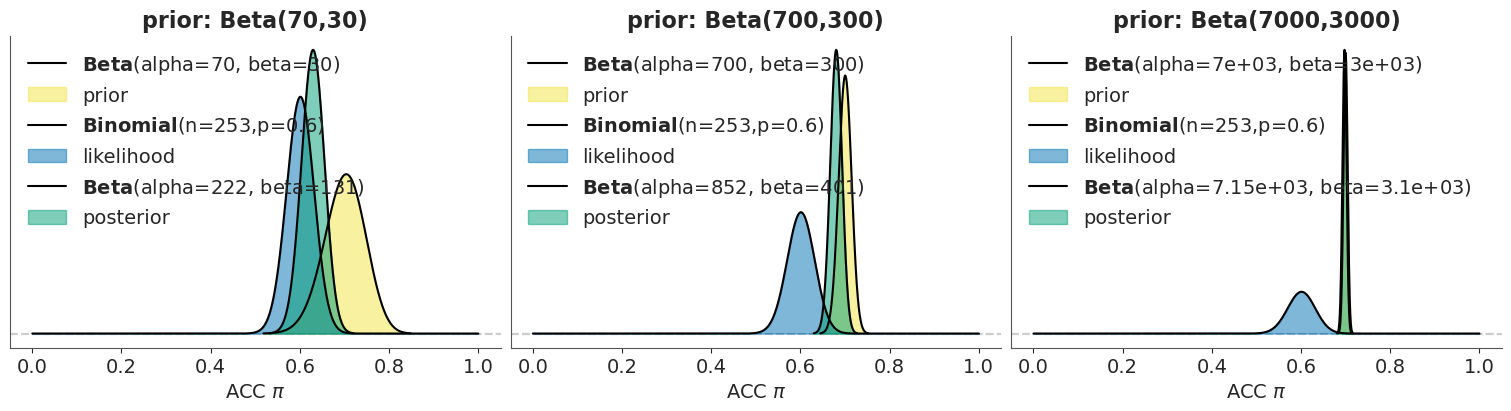

In [208]:
# 定义不同的 Beta 分布参数
params = [(70, 30), (700, 300), (7000, 3000)]

fig, axes = plt.subplots(nrows=1, ncols=len(params), figsize=(15, 4))

# 循环遍历不同的参数组合
for (alpha_, beta_),ax in zip(params, axes.flatten()):
   
    bayesian_analysis_plot(alpha=alpha_, beta=beta_, y=152, n=253, ax=ax)
    
    # 设置子图标题
    ax.set_title(f'prior: Beta({alpha_},{beta_})')

# 移除图的上、右边框线
sns.despine()

Tips：如何避免令人遗憾的先验模型  
	- 幸运的是，我们有一些好消息, 这种使得贝叶斯顺序分析失效的情况是完全可以避免的。  
	- 确保对每个可能的$\pi$值都分配非零的可信度，即使这个可信度接近于零。例如，如果$\pi$是一个可以从 0 到 1 的比例，那么你的先验模型也应该在这个连续范围内进行定义。  

![Image Name](https://cdn.kesci.com/upload/image/rhqcb9gji7.png?imageView2/0/w/500/h/500) 

### 贝叶斯的主观性

在之前我们提到了一个关于贝叶斯统计的常见批评观点——它的主观性。  
  
- 一些人担心“主观地”调整先验模型会使贝叶斯分析人员得出他们想要的任何结论。  
- 在学习完这节课后我们可以更严谨地回应这个观点。  

> 在我们回应之前，重新思考并扩展一下你在整本书中探讨过的一些概念。  
> ❔问题！对于下面的每个陈述，请判断该陈述是真还是假，并提供你的推理。  

- 所有的先验选择都是具有信息量的。  
- 有可能有充分的理由选择具有信息量的先验。  
- 任何先验选择都可以被足够多的数据克服。  
- 频率学派的范式是完全客观的。

答案：  

1. 错误。模糊的先验通常是不具有信息量的。  
2. 正确。我们可能有充足的先前数据或专业知识来构建我们的先验。  
3. 错误。如果你将潜在的参数值赋予零先验概率，任何数量的数据都无法改变它！  
4. 错误。主观性总是渗透到频率学派和贝叶斯分析中。在贝叶斯范式中，我们至少可以命名和量化这种主观性的方面。

🔍回顾：贝叶斯学派和频率学派的差异对比  

**任何统计分析方法都不可能完全客观，因此主观性是一个相对概念:**  

* 贝叶斯学派的主观性通过先验的设定来体现，透明，不易让人产生误解  

* 频率学派的主观性暗含在各种**前提预设**中，比如方差分析中的方差齐性和正态性，这种看似‘客观的’预设，一方面难以满足，一方面也是一种主观的设定。  

* 更为宏观的来说，样本的抽取，数据清理方式的选择，分析方法的选择，$p$值的设定，这些都存在主观性。因此，频率学派并没有想象的那么‘客观’。  

* 主观不一定是坏事：通过量化方法将个体的经验和专家知识整合到数据分析之中。  


| **频率学派**                                           | **贝叶斯学派**                                         |  
|-------------------------------------------------------|-------------------------------------------------------|  
| **概率定义**：概率是事件在无限重复试验中的频率          | **概率定义**：概率是对假设的信念度量                   |  
| **假设**：假设是固定的，数据是随机的                    | **假设**：假设是随机的，数据是固定的                   |  
| **推断方式**：基于假设检验，通过$p$值判断是否拒绝零假设    | **推断方式**：通过更新先验与新数据计算后验概率         |  
| **置信区间**：在重复试验中，95%的区间包含真实参数         | **可信区间**：给出某参数位于区间内的概率（如95%可信度） |  
| **$p$值**：衡量在零假设下，观测数据或更极端数据的概率      | **后验概率**：给出假设为真的更新概率                   |  
| **数据独立性**：推断只基于当前试验数据，不考虑先验信息    | **先验信息**：结合历史数据或专家意见，用于更新推断     |  
| **实验重复性假设**：推断基于实验的假想重复性              | **逐步积累信息**：通过结合新数据不断更新和完善假设     |  
| **适应性**：实验设计固定，不能在中途更新或调整             | **适应性**：可以灵活调整试验设计和决策，如自适应试验   |  

来源：  
> Goligher, E. C., Heath, A., & Harhay, M. O. (2024). Bayesian statistics for clinical research. The Lancet, 404(10457), 1067-1076.

**总结**：贝叶斯分析确实可以基于“主观”经验建立先验。  
- 这不定是件坏事，先验可以反映出丰富的过去经验，这些经验应该纳入我们的分析中。相反，如果不这么做对我们的数据分析来说是很大的损失。即使主观先验与实际观察到的证据相矛盾，随着证据的累积，先验的影响会逐渐消失。  
  
- 极端的先验不受到数据影响，但这种情况是避免的。如果主观先验非常地顽固和极端，它会将可能的参数值的概率分配为零，那么任何数量的反证据都不足以改变它。

## Striking a balance between the prior & data

**不同先验+不同似然产生的后验分布**  

**--> 后验分布是两者间的平衡。**  

我们可以将不同的先验和似然组合在一起，观察后验的变化

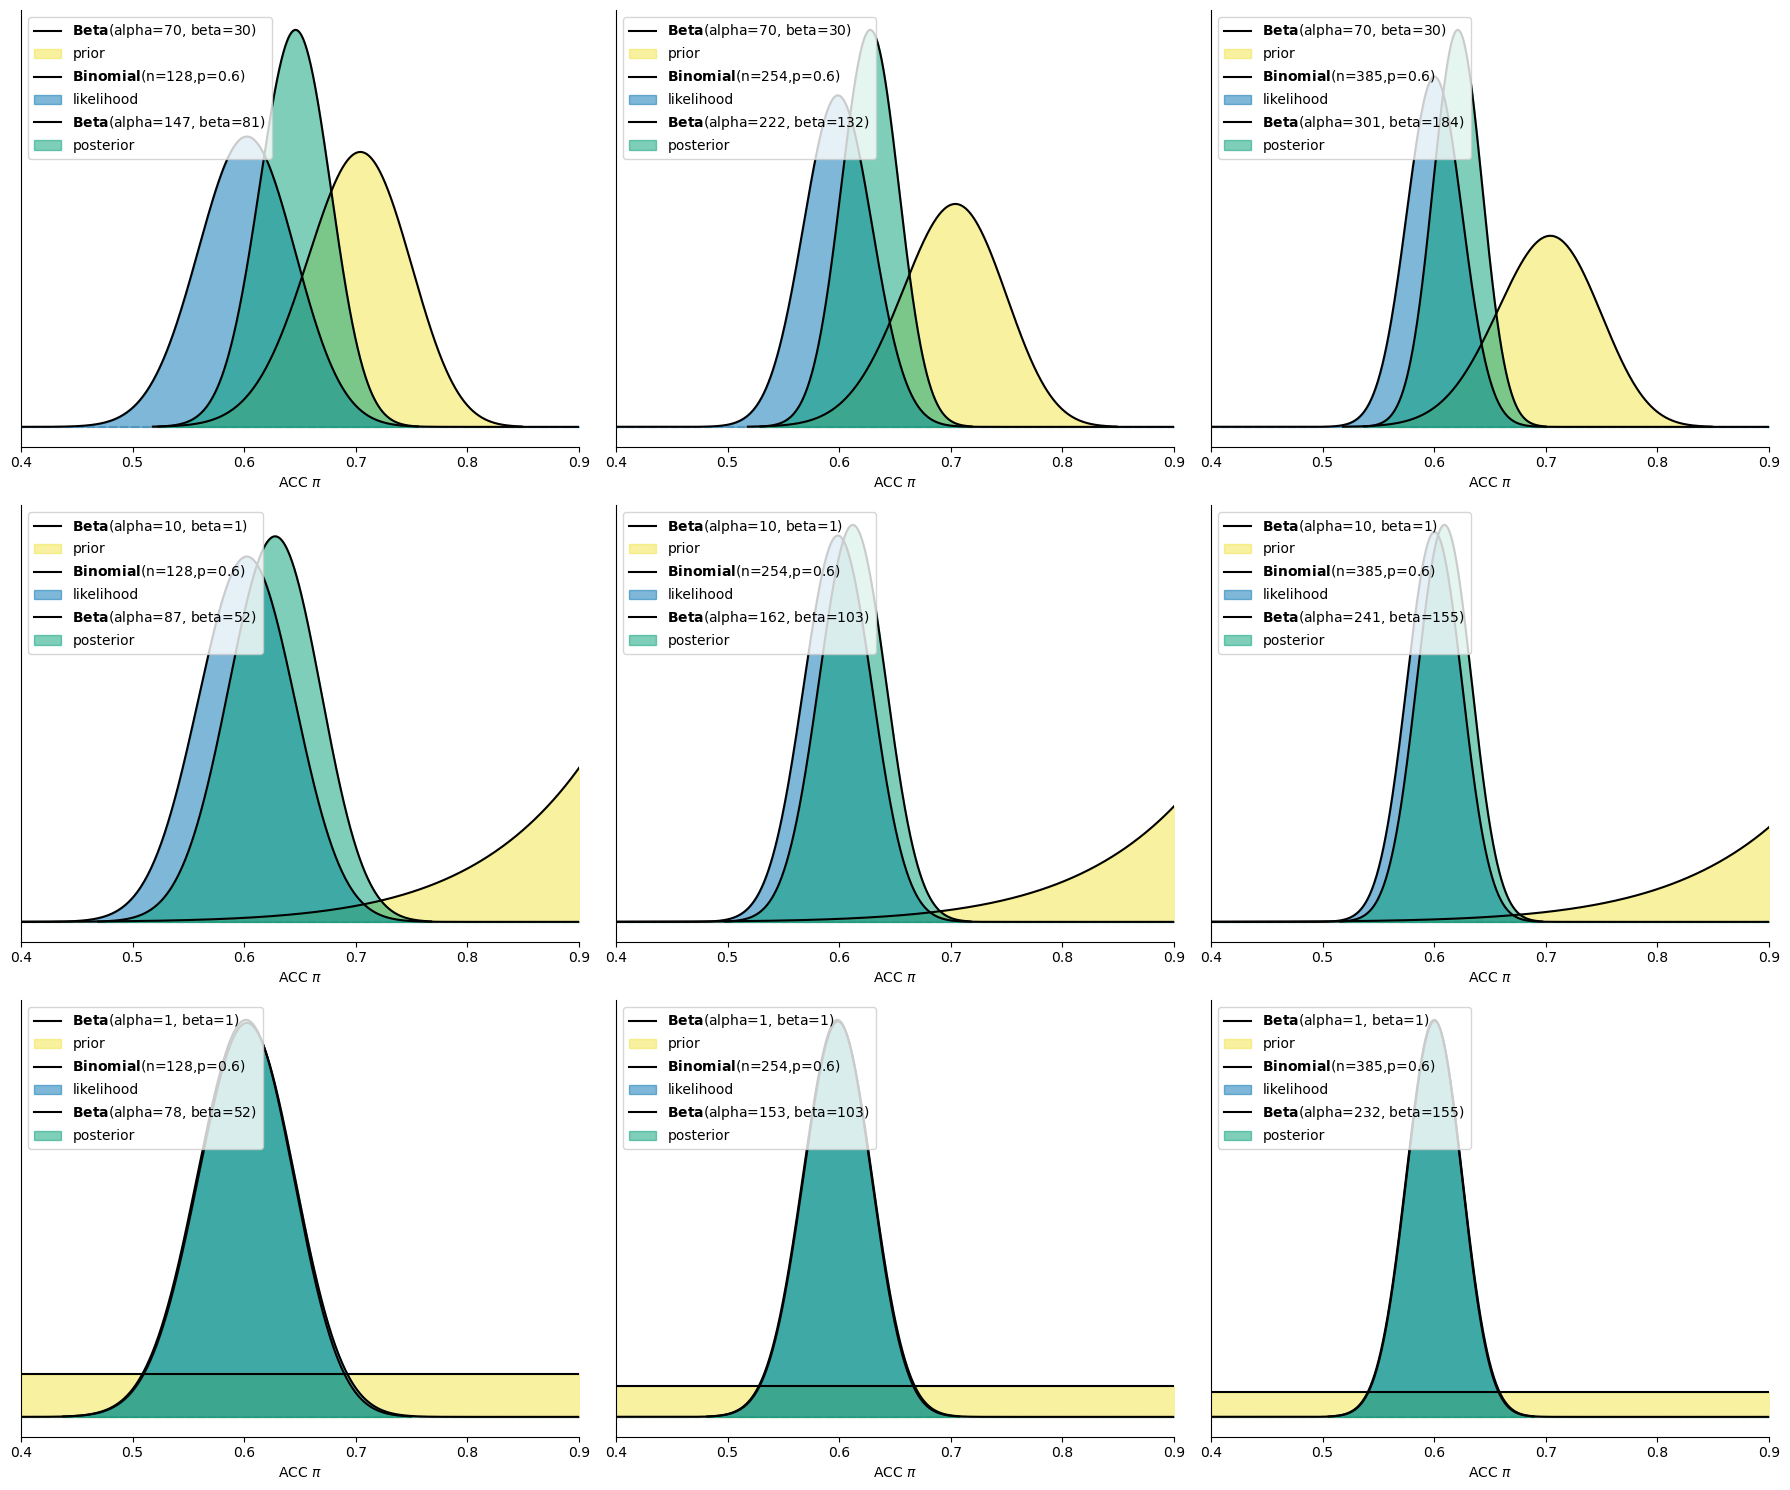

In [9]:
# 创建 3x3 的子图布局
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 调用绘制函数，对不同的先验和似然进行组合
bayesian_analysis_plot(70, 30, 77, 128, axes[0, 0])
bayesian_analysis_plot(70, 30, 152, 254, axes[0, 1])
bayesian_analysis_plot(70, 30, 231, 385, axes[0, 2])
bayesian_analysis_plot(10, 1, 77, 128, axes[1, 0])
bayesian_analysis_plot(10, 1, 152, 254, axes[1, 1])
bayesian_analysis_plot(10, 1, 231, 385, axes[1, 2])
bayesian_analysis_plot(1, 1, 77, 128, axes[2, 0])
bayesian_analysis_plot(1, 1, 152, 254, axes[2, 1])
bayesian_analysis_plot(1, 1, 231, 385, axes[2, 2])


# 设置 x 轴范围
for ax in axes.flatten():
    ax.set_xlim(0.4, 0.9)

# 调整布局
plt.tight_layout()  

* 从左往右，数据的试次从128增加到385，似然的分布越集中，对后验的影响也越来越大  

* 从上往下，先验分布从信息型(informative prior)变为模糊型(vague prior)，先验分布对后验分布的影响也就越来越小  

* 而最后一列告诉我们，无论不同的人对先验的差异有多大，只要似然的分布够集中，即数据提供的信息足够丰富，那么后验分布主要受到来自数据的影响，不同人的后验分布也并不会相差太大。

我们再次看到后验是先验模型和数据的平衡。总的来说，会观察到以下趋势：  

- 先验影响：先验越不模糊、越具有信息量，即我们对先验越有确定性，先验对后验的影响就越大。
  
- 数据影响：我们拥有的数据越多，数据对后验的影响就越大。因此，即使具有不同的先验，如果两次测量的数据充足并且相似，那么他们的后验结果会非常相似。 
 
- 此外，在顺序贝叶斯分析中，随着数据越来越多，后验逐渐更新。这个后验的最终结果不受观察数据的顺序（即后验对数据的顺序不变）。

## 代码练习

练习 4.1（将先验与描述配对）。  

下面列出了五种不同的π的先验模型。  
请用以下描述之一标记每个先验：有些偏向 $\pi$ < 0.5，有些强烈偏向$\pi$ < 0.5，有些将$\pi$置于0.5中心，有些偏向$\pi$ > 0.5，有些强烈偏向$\pi$ > 0.5。  
- a) Beta(1.8,1.8)  
- b) Beta(3,2)  
- c) Beta(1,10)  
- d) Beta(1,3)  
- e) Beta(17,2)  

练习 4.2（将图形与代码配对）。  

下面的绘图函数更可能使用了哪些参数生成了下面的图形？  
![](https://www.bayesrulesbook.com/bookdown_files/figure-html/unnamed-chunk-142-1.png)  
- a) $\alpha$ = 2, $\beta$ = 2, y = 8, n = 11  
- b) $\alpha$ = 2, $\beta$ = 2, y = 3, n = 11  
- c) $\alpha$ = 3, $\beta$ = 8, y = 2, n = 6  
- d) $\alpha$ = 3, $\beta$ = 8, y = 4, n = 6  
- e) $\alpha$ = 3, $\beta$ = 8, y = 2, n = 4  
- f) $\alpha$ = 8, $\beta$ = 3, y = 2, n = 4

In [78]:
# 导入数据加载和处理包：pandas
import pandas as pd
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt
# 导入高级绘图工具 seaborn 为 sns
import seaborn as sns
# 导入概率分布计算和可视化包：preliz
import preliz as pz

def bayesian_analysis_plot(
    alpha, beta, y, n, 
    ax=None, 
    plot_prior=True, 
    plot_likelihood=True, 
    plot_posterior=True, 
    xlabel=r"ACC $\pi$", 
    show_legend=True,
    legend_loc="upper left"):
    """
    该函数绘制先验分布、似然分布和后验分布的 PDF 图示在指定的子图上。
    
    参数:
    - alpha: Beta 分布的 alpha 参数（先验）
    - beta: Beta 分布的 beta 参数（先验）
    - y: 观测数据中的支持次数
    - n: 总样本数
    - ax: 子图对象，在指定子图上绘制图形
    """

    if ax is None:
        ax = plt.gca()

    if plot_prior:
        # 先验分布
        prior = pz.Beta(alpha, beta)
        prior.plot_pdf(color="black", ax=ax, legend="None")
        x_prior = np.linspace(prior.ppf(0.0001), prior.ppf(0.9999), 100)
        ax.fill_between(x_prior, prior.pdf(x_prior), color="#f0e442", alpha=0.5, label="prior")

    if plot_likelihood:
        # 似然分布 (两种写法等价)
        # likelihood = pz.Beta(y,n-y)
        # likelihood.plot_pdf(color="black", ax=ax, legend="None")
        x = np.linspace(0,1,1000)
        likelihood = pz.Binomial(n=n, p=y/n).pdf(x=x*n)
        likelihood = likelihood * n
        ax.plot(x, likelihood, color="black", label=r"$\mathbf{Binomial}$"+rf"(n={n},p={round(y/n,2)})")
        ax.fill_between(x, likelihood, color="#0071b2", alpha=0.5, label="likelihood")

    if plot_posterior:
        # 后验分布
        posterior = pz.Beta(alpha + y, beta + n - y)
        posterior.plot_pdf(color="black", ax=ax, legend="None")
        x_posterior = np.linspace(posterior.ppf(0.0001), posterior.ppf(0.9999), 100)
        ax.fill_between(x_posterior, posterior.pdf(x_posterior), color="#009e74", alpha=0.5, label="posterior")

    if show_legend:
        ax.legend(loc=legend_loc)
    else:
        ax.legend().set_visible(False)

    # 设置图形
    ax.set_xlabel(xlabel)
    sns.despine()

In [ ]:
#---------------------------------------------------------------------------
#                            请替换...填入 Beta 分布参数, alpha 和 beta
#---------------------------------------------------------------------------
# 设置 Beta 分布参数
alpha = ...     # alpha
beta  = ...     # beta

#---------------------------------------------------------------------------
#                            请替换...请填入观测数据 y 和 n
#---------------------------------------------------------------------------
y = ...     # y 代表支持数
n = ...     # n 代表总人数

#---------------------------------------------------------------------------
#                            请使用 bayesian_analysis_plot 进行绘图
#---------------------------------------------------------------------------
bayesian_analysis_plot(...)

经过尝试不同的参数和数据配置后，请进行思考🤔：
- 如何设置可以得到弱信息先验？
- 什么数据条件下，似然对于后验的影响最大。

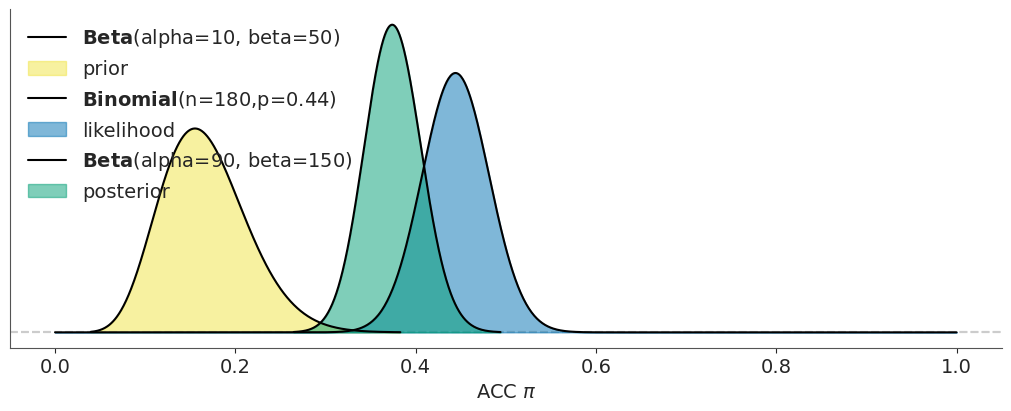

In [209]:
# 答案

#---------------------------------------------------------------------------
#                            请填入 Beta 分布参数，alpha 和 beta
#---------------------------------------------------------------------------
# 设置 Beta 分布参数
alpha = 8     # alpha
beta  = 3     # beta

#---------------------------------------------------------------------------
#                            请填入观测数据 y 和 n
#---------------------------------------------------------------------------
y = 2     # y 代表支持数
n = 4     # n 代表总人数

bayesian_analysis_plot(alpha, beta, y, n)

### 💐Bonus：使用数学公式证明，后验确实利用了来自先验和似然的信息

（* 注：以下涉及的公式包含上一节bonus中的内容）  

由于后验分布属于beta分布，因此它的平均值可以写成：  

$$  
E(\pi | Y=y)  = \frac{\alpha + y}{\alpha + \beta + n}  .  
$$  

我们可以将$\frac{\alpha + y}{\alpha + \beta + n}$拆成以下两部分  

$$  
E(\pi | Y=y)  
= \frac{\alpha}{\alpha + \beta + n} + \frac{y}{\alpha + \beta + n}  \\  
= \frac{\alpha}{\alpha + \beta + n}\cdot\frac{\alpha + \beta}{\alpha + \beta} + \frac{y}{\alpha + \beta + n}\cdot\frac{n}{n}  \\  
= \frac{\alpha + \beta}{\alpha + \beta + n}\cdot\frac{\alpha}{\alpha + \beta} + \frac{n}{\alpha + \beta + n}\cdot\frac{y}{n}  \\  
= \frac{\alpha + \beta}{\alpha + \beta + n}\cdot E(\pi) + \frac{n}{\alpha + \beta + n}\cdot\frac{y}{n}  .  \\  
$$  

$$  
y: success \space trial,\; n: total \space trials \\  
y/n表示观察到的数据比例  
$$  

且，  
$$  
\frac{\alpha + \beta}{\alpha + \beta + n} + \frac{n}{\alpha + \beta + n} = 1.  

$$  


可以看到，后验均值可以被分解为  
<center>  
权重*先验均值 + 权重*数据  
</center>  

那么，当数据越多，即$n$越大时，先验的权重就会更小，接近0；而数据的权重就会越大  

因此，后验正是权衡了来自先验和似然的信息